In [1]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

In [2]:
wcat = pd.read_csv("Salary_Data.csv")

In [3]:
wcat

,ye,sr
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
wcat.describe()

,ye,sr
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [26]:
# correlation
np.corrcoef(wcat.ye, wcat.sr) 

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [27]:
# Covariance

# NumPy does not have a function to calculate the covariance between 
#two variables directly. 

# Function for calculating a covariance matrix called cov() 

# By default, the cov() function will calculate the unbiased or 
#sample covariance between the provided random variables.

cov_output = np.cov(wcat.ye, wcat.sr)[0, 1]

In [28]:
cov_output

76106.30344827585

In [29]:
#Import library

import statsmodels.formula.api as smf

# Simple Linear Regression

model = smf.ols('sr ~ ye', data = wcat).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        21:31:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

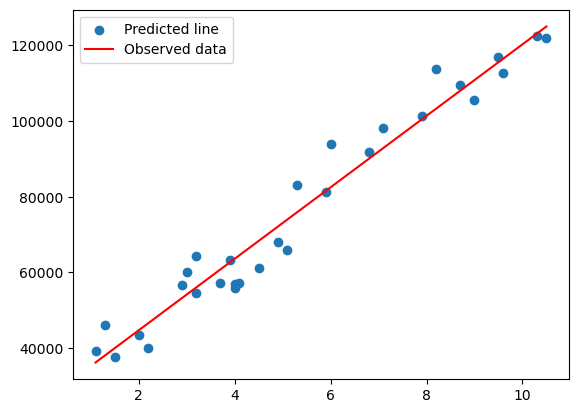

In [33]:
pred1 = model.predict(pd.DataFrame(wcat['ye']))

# Regression Line
plt.scatter(wcat.ye, wcat.sr)
plt.plot(wcat.ye, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [34]:
# Error calculation

res1 = wcat.sr - pred1

res_sqr1 = res1 * res1

mse1 = np.mean(res_sqr1)

rmse1 = np.sqrt(mse1)

rmse1

5592.043608760661

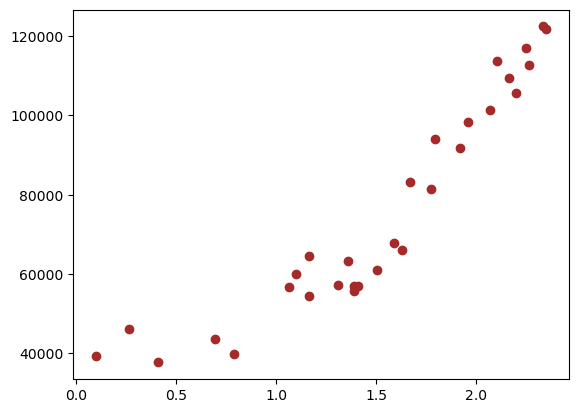

In [35]:
######### Model building on Transformed Data

# Log Transformation

# x = log(waist); y = at

plt.scatter(x = np.log(wcat['ye']), y = wcat['sr'], color = 'brown')



In [37]:
np.corrcoef(np.log(wcat.ye), wcat.sr) #correlation


array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

In [38]:
model2 = smf.ols('sr ~ np.log(ye)', data = wcat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        21:35:14   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(ye)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
pred2 = model2.predict(pd.DataFrame(wcat['ye']))

In [40]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

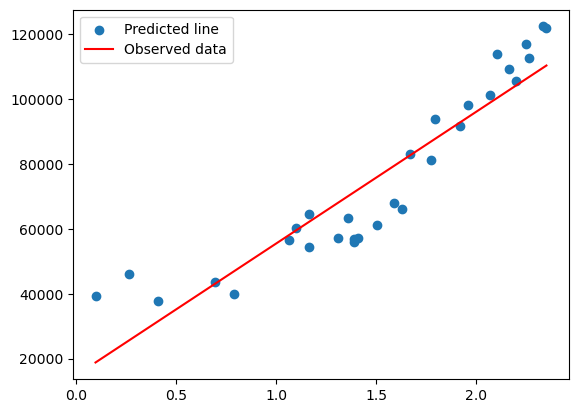

In [41]:
# Regression Line
plt.scatter(np.log(wcat.ye), wcat.sr)
plt.plot(np.log(wcat.ye), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [42]:
res2 = wcat.sr - pred2

res_sqr2 = res2 * res2

mse2 = np.mean(res_sqr2)

rmse2 = np.sqrt(mse2)

rmse2

10302.893706228308

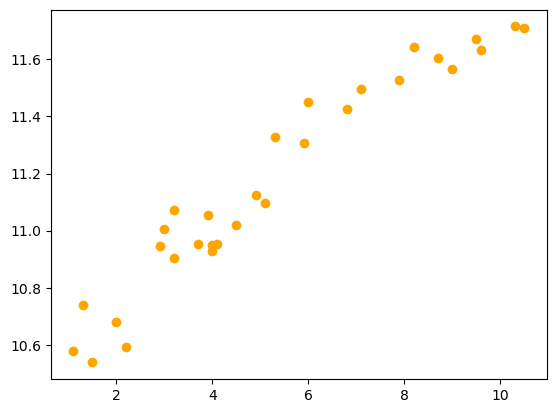

In [43]:
#### Exponential transformation

# x = waist; y = log(at)

plt.scatter(x = wcat['ye'], y = np.log(wcat['sr']), color = 'orange')

In [44]:
np.corrcoef(wcat.ye, np.log(wcat.sr)) #correlation

array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

In [46]:
model3 = smf.ols('np.log(sr) ~ ye', data = wcat).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(sr)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        21:38:13   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
ye             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
pred3 = model3.predict(pd.DataFrame(wcat['ye']))

pred3_at = np.exp(pred3)

pred3_at

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

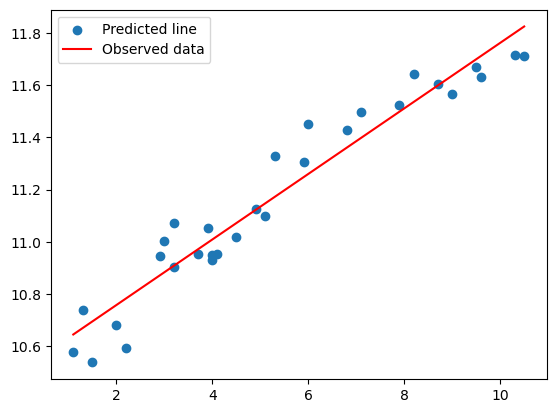

In [48]:
# Regression Line
plt.scatter(wcat.ye, np.log(wcat.sr))
plt.plot(wcat.ye, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [49]:
# Error calculation

res3 = wcat.sr - pred3_at

res_sqr3 = res3 * res3

mse3 = np.mean(res_sqr3)

rmse3 = np.sqrt(mse3)

rmse3

7213.235076620129

In [51]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(sr) ~ ye + I(ye*ye)', data = wcat).fit()
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(sr)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           3.95e-18
Time:                        21:41:19   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
ye             0.2024      0.027      7.601      0.000       0.148       0.257
I(ye * ye)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [55]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


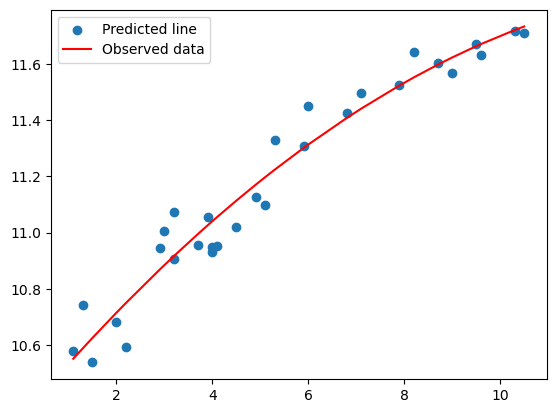

In [56]:
plt.scatter(wcat.ye, np.log(wcat.sr))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [57]:
# Error calculation
res4 = wcat.sr - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

5391.081582693624

In [58]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,5592.043609
1,Log model,10302.893706
2,Exp model,7213.235077
3,Poly model,5391.081583


In [59]:
###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

finalmodel = smf.ols('np.log(sr) ~ ye + I(ye*ye)', data = train).fit()

finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(sr)   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     211.3
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.23e-14
Time:                        21:44:25   Log-Likelihood:                 27.143
No. Observations:                  24   AIC:                            -48.29
Df Residuals:                      21   BIC:                            -44.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2547      0.074    138.381      0.000      10.101      10.409
ye             0.2308      0.029      7.892      0.000       0.170       0.292
I(ye * ye)    -0.0087      0.003     -3.483      0.002      -0.014      -0.004
==============================================================================
Omnibus:                        0.662   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.728
Skew:                           0.260   Prob(JB):                        0.695
Kurtosis:                       2.323   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Predict on test data

test_pred = finalmodel.predict(pd.DataFrame(test))

pred_test_sr = np.exp(test_pred)

pred_test_sr

9      59218.178557
12     62194.794127
28    121079.762250
6      52492.604658
1      37795.995756
26    115624.083342
dtype: float64

In [61]:
# Model Evaluation on Test data

test_res = test.sr - pred_test_sr

test_sqrs = test_res * test_res

test_mse = np.mean(test_sqrs)

test_rmse = np.sqrt(test_mse)

test_rmse

5234.934797262584

In [62]:
# Prediction on train data

train_pred = finalmodel.predict(pd.DataFrame(train))

pred_train_sr = np.exp(train_pred)

pred_train_sr

8      54379.741734
14     67256.267467
13     63197.767794
16     73451.371998
10     61197.030747
23    104746.450956
5      51560.206102
29    122269.343209
25    111702.896696
20     91110.729975
15     71375.327369
7      54379.741734
17     75534.923522
11     62194.794127
18     81802.755242
19     82846.091956
27    116363.597072
3      43535.573226
21     94146.120322
2      39388.379202
24    109184.844981
0      36242.617452
22    101956.222612
4      45258.783217
dtype: float64

In [63]:
# Model Evaluation on train data

train_res = train.sr- pred_train_sr

train_sqrs = train_res * train_res

train_mse = np.mean(train_sqrs)

train_rmse = np.sqrt(train_mse)

train_rmse

5351.757840213944